#### Author: Mustafa Radheyyan
#### Date: 05/08/2023
#### Assignment: Cognixia JUMPlus Python Project 6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## 1. Import all required libraries

In [559]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Path of data source

In [560]:
AMAZON_CSV_PATH = 'amazon.csv'

Context Manager helper functions for displaying DataFrames differently than the default configuration settings

In [561]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [562]:
def force_show_all_rows(df):
    with pd.option_context('display.max_rows', None, 'display.width', None):
        display(df)

In [563]:
def use_inf_as_na(df, df_command):
    with pd.option_context('mode.use_inf_as_na', True):
        return df_command(df)

## 2. Read the csv file and if you experience ‘unicodedecodeerror’ then give second parameter in read_csv method as ‘encoding=iso-8859-1’

There are no specific index columns in this dataset.

In [564]:
amazon_df = pd.read_csv(AMAZON_CSV_PATH, encoding = "ISO-8859-1")

In [565]:
for column in amazon_df.columns:
    print(len(amazon_df[column].unique()), 'out of', len(amazon_df))

20 out of 6454
23 out of 6454
12 out of 6454
1479 out of 6454
20 out of 6454


In [566]:
amazon_df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


## Data Cleaning

##### Convert DF Column Name List

Made DataFrame's columns snake case in order to be more computing friendly<br></br>
Made a list of the dataframe's columns to enable easier searching of column names

In [567]:
amazon_df.columns = amazon_df.columns.str.replace(' ', '_').str.lower()
amazon_columns = list(amazon_df.columns)
amazon_columns

['year', 'state', 'month', 'number', 'date']

#### Data Cleaning

Validating if the 'year' column is identical to the year in the 'date' column.

The results have validated that the 'year' column is identical to the year in the 'date' column.

In [568]:
len(amazon_df), amazon_df.loc[amazon_df['year'] == amazon_df['date'].str[:4].astype(int)]

(6454,
       year      state     month  number        date
 0     1998       Acre   Janeiro     0.0  1998-01-01
 1     1999       Acre   Janeiro     0.0  1999-01-01
 2     2000       Acre   Janeiro     0.0  2000-01-01
 3     2001       Acre   Janeiro     0.0  2001-01-01
 4     2002       Acre   Janeiro     0.0  2002-01-01
 ...    ...        ...       ...     ...         ...
 6449  2012  Tocantins  Dezembro   128.0  2012-01-01
 6450  2013  Tocantins  Dezembro    85.0  2013-01-01
 6451  2014  Tocantins  Dezembro   223.0  2014-01-01
 6452  2015  Tocantins  Dezembro   373.0  2015-01-01
 6453  2016  Tocantins  Dezembro   119.0  2016-01-01
 
 [6454 rows x 5 columns])

In [569]:
amazon_df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Marï¿½o', 'Abril', 'Maio', 'Junho',
       'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

Fixing occurrences of misspelled or misplaced Março (March) month name

In [570]:
unicode_character_replacement_ç = {'Mar\uFFFDo': "Março",
                                 'Marï¿½o': "Março"}

In [571]:
amazon_df['month'] = amazon_df['month'].replace(unicode_character_replacement_ç, regex=True)

In [572]:
amazon_df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [573]:
portuguese_month_names_dict = {"01": "janeiro",
                               "02": "fevereiro",
                               "03": "março",
                               "04": "abril",
                               "05": "maio",
                               "06": "junho",
                               "07": "julho",
                               "08": "agosto",
                               "09": "setembro",
                               "10": "outubro",
                               "11": "novembro",
                               "12": "dezembro" 
}

In [574]:
portuguese_month_number_dict = {"janeiro": "01",
                               "fevereiro": "02",
                               "março": "03",
                               "abril": "04",
                               "maio": "05",
                               "junho": "06",
                               "julho": "07",
                               "agosto": "08",
                               "setembro": "09",
                               "outubro": "10",
                               "novembro": "11",
                               "dezembro": "12"
}

In [575]:
amazon_df['date'].str[5:7].unique()

array(['01'], dtype=object)

In [576]:
amazon_df['date'].str[-2:].unique()

array(['01'], dtype=object)

In [577]:
amazon_df['date'].str[4:].unique()

array(['-01-01'], dtype=object)

Comparing month of "date" column to month as written out in the "month" column

In [578]:
len(amazon_df), (
    amazon_df
    .loc[
        amazon_df['month']
        .str
        .lower() 
        == 
        amazon_df['date']
        .str[5:7]
        .replace(portuguese_month_names_dict)
        .str
        .lower()
        ]
    )

(6454,
       year      state    month  number        date
 0     1998       Acre  Janeiro     0.0  1998-01-01
 1     1999       Acre  Janeiro     0.0  1999-01-01
 2     2000       Acre  Janeiro     0.0  2000-01-01
 3     2001       Acre  Janeiro     0.0  2001-01-01
 4     2002       Acre  Janeiro     0.0  2002-01-01
 ...    ...        ...      ...     ...         ...
 6230  2013  Tocantins  Janeiro    50.0  2013-01-01
 6231  2014  Tocantins  Janeiro    89.0  2014-01-01
 6232  2015  Tocantins  Janeiro   186.0  2015-01-01
 6233  2016  Tocantins  Janeiro    42.0  2016-01-01
 6234  2017  Tocantins  Janeiro    61.0  2017-01-01
 
 [541 rows x 5 columns])

In [579]:
amazon_df['date'] = amazon_df['date'].str.removesuffix('-01')

In [580]:
amazon_df = amazon_df.rename(columns={'date': 'date-yyyy-mm'})

In [581]:
amazon_df

,year,state,month,number,date-yyyy-mm
0,1998,Acre,Janeiro,0.0,1998-01
1,1999,Acre,Janeiro,0.0,1999-01
2,2000,Acre,Janeiro,0.0,2000-01
3,2001,Acre,Janeiro,0.0,2001-01
4,2002,Acre,Janeiro,0.0,2002-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01
6450,2013,Tocantins,Dezembro,85.0,2013-01
6451,2014,Tocantins,Dezembro,223.0,2014-01
6452,2015,Tocantins,Dezembro,373.0,2015-01


Comparing year of "date" column to year as the number in the "year" column

In [582]:
len(amazon_df), amazon_df.loc[amazon_df['year'] == amazon_df['date-yyyy-mm'].str[:4].astype(int)]

(6454,
       year      state     month  number date-yyyy-mm
 0     1998       Acre   Janeiro     0.0      1998-01
 1     1999       Acre   Janeiro     0.0      1999-01
 2     2000       Acre   Janeiro     0.0      2000-01
 3     2001       Acre   Janeiro     0.0      2001-01
 4     2002       Acre   Janeiro     0.0      2002-01
 ...    ...        ...       ...     ...          ...
 6449  2012  Tocantins  Dezembro   128.0      2012-01
 6450  2013  Tocantins  Dezembro    85.0      2013-01
 6451  2014  Tocantins  Dezembro   223.0      2014-01
 6452  2015  Tocantins  Dezembro   373.0      2015-01
 6453  2016  Tocantins  Dezembro   119.0      2016-01
 
 [6454 rows x 5 columns])

Testing out the portuguese month to number dictionary replacement

In [583]:
amazon_df['month'].str.lower().replace(portuguese_month_number_dict)

0       01
1       01
2       01
3       01
4       01
        ..
6449    12
6450    12
6451    12
6452    12
6453    12
Name: month, Length: 6454, dtype: object

Adding a date string column by appending the year and the 2-digit value of the month columns

In [584]:
amazon_df['date-yyyy-mm'] = (amazon_df['year']
                             .astype('str')
                             + '-' 
                             + amazon_df['month']
                             .str
                             .lower()
                             .replace(portuguese_month_number_dict)
)

In [585]:
amazon_df['date-yyyy-mm']

0       1998-01
1       1999-01
2       2000-01
3       2001-01
4       2002-01
         ...   
6449    2012-12
6450    2013-12
6451    2014-12
6452    2015-12
6453    2016-12
Name: date-yyyy-mm, Length: 6454, dtype: object

Comparing month of "date" column to month as written out in the "month" column

In [586]:
len(amazon_df), (
    amazon_df
    .loc[
        amazon_df['date-yyyy-mm']
        .str[-2:] 
        == 
        amazon_df['month']
        .str
        .lower()
        .replace(portuguese_month_number_dict)
        ]
)

(6454,
       year      state     month  number date-yyyy-mm
 0     1998       Acre   Janeiro     0.0      1998-01
 1     1999       Acre   Janeiro     0.0      1999-01
 2     2000       Acre   Janeiro     0.0      2000-01
 3     2001       Acre   Janeiro     0.0      2001-01
 4     2002       Acre   Janeiro     0.0      2002-01
 ...    ...        ...       ...     ...          ...
 6449  2012  Tocantins  Dezembro   128.0      2012-12
 6450  2013  Tocantins  Dezembro    85.0      2013-12
 6451  2014  Tocantins  Dezembro   223.0      2014-12
 6452  2015  Tocantins  Dezembro   373.0      2015-12
 6453  2016  Tocantins  Dezembro   119.0      2016-12
 
 [6454 rows x 5 columns])

In [587]:
amazon_df

,year,state,month,number,date-yyyy-mm
0,1998,Acre,Janeiro,0.0,1998-01
1,1999,Acre,Janeiro,0.0,1999-01
2,2000,Acre,Janeiro,0.0,2000-01
3,2001,Acre,Janeiro,0.0,2001-01
4,2002,Acre,Janeiro,0.0,2002-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-12
6450,2013,Tocantins,Dezembro,85.0,2013-12
6451,2014,Tocantins,Dezembro,223.0,2014-12
6452,2015,Tocantins,Dezembro,373.0,2015-12


Dropping redundant year and month columns

In [588]:
amazon_df_clean = amazon_df.drop(columns=['year', 'month'])

In [589]:
amazon_df_clean

,state,number,date-yyyy-mm
0,Acre,0.0,1998-01
1,Acre,0.0,1999-01
2,Acre,0.0,2000-01
3,Acre,0.0,2001-01
4,Acre,0.0,2002-01
...,...,...,...
6449,Tocantins,128.0,2012-12
6450,Tocantins,85.0,2013-12
6451,Tocantins,223.0,2014-12
6452,Tocantins,373.0,2015-12


In [590]:
amazon_df_clean['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Parï¿½', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Fixing occurrences of misspelled or misplaced Pará state name

In [591]:
unicode_character_replacement_pará = {'Par\uFFFD': 'Pará',
                                 'Parï¿½': 'Pará'}

In [592]:
amazon_df_clean['state'] = amazon_df_clean['state'].replace(unicode_character_replacement_pará, regex=True)

In [593]:
amazon_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         6454 non-null   object 
 1   number        6454 non-null   float64
 2   date-yyyy-mm  6454 non-null   object 
dtypes: float64(1), object(2)
memory usage: 151.4+ KB


Searching for rows in the 'number' column where the number is not an integer (has a decimal part different than .0).

In [594]:
amazon_df_clean.loc[([not x.is_integer() for x in amazon_df_clean['number']])]

,state,number,date-yyyy-mm
145,Acre,1.976,2003-08
147,Acre,4.198,2005-08
152,Acre,1.682,2010-08
156,Acre,1.100,2014-08
157,Acre,1.397,2015-08
...,...,...,...
6409,Tocantins,3.680,2012-10
6410,Tocantins,2.155,2013-10
6412,Tocantins,4.844,2015-10
6413,Tocantins,2.032,2016-10


Rounding all of the numbers in the 'number' column to the nearest number with zero decimal points.

In [595]:
amazon_df_clean['number'] = amazon_df_clean['number'].round(0)

Explicitly converting data types of DataFrame (including converting the 'number' column to 'int64')

In [596]:
amazon_df_clean = amazon_df_clean.convert_dtypes()

Adjusted position of date column to be the first column

In [597]:
amazon_df_clean.insert(0, 'date-yyyy-mm', amazon_df_clean.pop('date-yyyy-mm'))

In [598]:
amazon_df_clean

,date-yyyy-mm,state,number
0,1998-01,Acre,0
1,1999-01,Acre,0
2,2000-01,Acre,0
3,2001-01,Acre,0
4,2002-01,Acre,0
...,...,...,...
6449,2012-12,Tocantins,128
6450,2013-12,Tocantins,85
6451,2014-12,Tocantins,223
6452,2015-12,Tocantins,373


In [599]:
amazon_columns = list(amazon_df_clean.columns)

In [600]:
amazon_df_clean.head(10)

,date-yyyy-mm,state,number
0,1998-01,Acre,0
1,1999-01,Acre,0
2,2000-01,Acre,0
3,2001-01,Acre,0
4,2002-01,Acre,0
5,2003-01,Acre,10
6,2004-01,Acre,0
7,2005-01,Acre,12
8,2006-01,Acre,4
9,2007-01,Acre,0


In [601]:
amazon_df_clean.tail(10)

,date-yyyy-mm,state,number
6444,2007-12,Tocantins,13
6445,2008-12,Tocantins,7
6446,2009-12,Tocantins,46
6447,2010-12,Tocantins,72
6448,2011-12,Tocantins,105
6449,2012-12,Tocantins,128
6450,2013-12,Tocantins,85
6451,2014-12,Tocantins,223
6452,2015-12,Tocantins,373
6453,2016-12,Tocantins,119


## 3. Check data type of each column

In [602]:
display(amazon_df_clean.dtypes)

date-yyyy-mm    string[python]
state           string[python]
number                   Int64
dtype: object

### a. Find what is the type of ‘date’ column is

In [603]:
print(amazon_df_clean.dtypes['date-yyyy-mm'])

string


### b. If it is of ‘object’ type, we need to convert the type into datetime

In [604]:
pd.to_datetime(amazon_df_clean['date-yyyy-mm'])

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
6449   2012-12-01
6450   2013-12-01
6451   2014-12-01
6452   2015-12-01
6453   2016-12-01
Name: date-yyyy-mm, Length: 6454, dtype: datetime64[ns]

### c. For conversion you need to make changes again in read_csv method, put third parameter into it for parsing dates (you need to figure out by yourself regarding third parameter)

In [605]:
amazon_df_date = pd.read_csv(
    AMAZON_CSV_PATH,
    usecols=lambda x: x != "date",
    parse_dates={'date':['year', 'month']},
    date_format='%Y-%m'
    )

In [606]:
amazon_df_date.dtypes

date       object
state      object
number    float64
dtype: object

In [607]:
amazon_df_date

,date,state,number
0,1998 Janeiro,Acre,0.0
1,1999 Janeiro,Acre,0.0
2,2000 Janeiro,Acre,0.0
3,2001 Janeiro,Acre,0.0
4,2002 Janeiro,Acre,0.0
...,...,...,...
6449,2012 Dezembro,Tocantins,128.0
6450,2013 Dezembro,Tocantins,85.0
6451,2014 Dezembro,Tocantins,223.0
6452,2015 Dezembro,Tocantins,373.0


The date_parser argument is deprecated since version 2.0.0. The documentations states: Use date_format instead, or read in as object and then apply to_datetime() as-needed.

The documentation for the date_format argument states: If used in conjunction with parse_dates, will parse dates according to this format. For anything more complex, please read in as object and then apply to_datetime() as-needed.

In this situation, I believe that it is too complex to perform month word translation to numbers within the read_csv method.

In [608]:
amazon_df_date['date'] = amazon_df_date['date'].replace(unicode_character_replacement_ç, regex=True)

In [609]:
portuguese_month_number_dict = {"janeiro": "01",
                               "fevereiro": "02",
                               "março": "03",
                               "abril": "04",
                               "maio": "05",
                               "junho": "06",
                               "julho": "07",
                               "agosto": "08",
                               "setembro": "09",
                               "outubro": "10",
                               "novembro": "11",
                               "dezembro": "12"
}

In [610]:
amazon_df_date['date'] = (amazon_df_date['date']
                          .str
                          .replace(" ", "-")
                          .replace(portuguese_month_number_dict)
                          .str
                          .lower()
                          .replace(portuguese_month_number_dict, regex=True)
                          )

In [611]:
amazon_df_date['date'] = pd.to_datetime(amazon_df_date['date'])

In [612]:
amazon_df_date

,date,state,number
0,1998-01-01,Acre,0.0
1,1999-01-01,Acre,0.0
2,2000-01-01,Acre,0.0
3,2001-01-01,Acre,0.0
4,2002-01-01,Acre,0.0
...,...,...,...
6449,2012-12-01,Tocantins,128.0
6450,2013-12-01,Tocantins,85.0
6451,2014-12-01,Tocantins,223.0
6452,2015-12-01,Tocantins,373.0


### d. Please check after making changes what is the data type of date column is (it should be datetime)

In [613]:
amazon_df_date.dtypes

date      datetime64[ns]
state             object
number           float64
dtype: object

## 4. Display top 5 rows of the dataset.

In [614]:
amazon_df_clean.head()

,date-yyyy-mm,state,number
0,1998-01,Acre,0
1,1999-01,Acre,0
2,2000-01,Acre,0
3,2001-01,Acre,0
4,2002-01,Acre,0


## 5. Check the last 5 rows.

In [615]:
amazon_df_clean.tail()

,date-yyyy-mm,state,number
6449,2012-12,Tocantins,128
6450,2013-12,Tocantins,85
6451,2014-12,Tocantins,223
6452,2015-12,Tocantins,373
6453,2016-12,Tocantins,119


## 6. Find the shape of our dataset (number of rows and number of columns).

### a. Kindly print number of rows and columns separately

In [616]:
print(f"{'Number of rows: ':<20}{amazon_df_clean.shape[0]}\n\
{'Number of columns: ':<20}{amazon_df_clean.shape[1]}")

Number of rows:     6454
Number of columns:  3


## 7. Getting information about our dataset like total number rows, total number of columns, datatypes of each column and memory requirement.

In [617]:
amazon_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date-yyyy-mm  6454 non-null   string
 1   state         6454 non-null   string
 2   number        6454 non-null   Int64 
dtypes: Int64(1), string(2)
memory usage: 157.7 KB


## 8. Check for duplicate data and drop them.

### a. You can use duplicated () method

In [618]:
amazon_df_clean.loc[amazon_df_clean.duplicated(keep=False)]

,date-yyyy-mm,state,number
258,2017-01,Alagoas,38
259,2017-01,Alagoas,38
2391,1998-01,Mato Grosso,0
2411,1998-02,Mato Grosso,0
2431,1998-03,Mato Grosso,0
...,...,...,...
4841,1998-04,Rio,0
4861,1998-05,Rio,0
4864,2001-05,Rio,4
4910,2007-07,Rio,7


### b. Please mention how many duplicate values are removed

In [619]:
print(f"{len(amazon_df_clean) - len(amazon_df_clean.drop_duplicates())} duplicate values were removed.")

33 duplicate values were removed.


In [620]:
amazon_df_clean = amazon_df_clean.drop_duplicates()

## 9. Check null values in the dataset.

### When we write isnull() method it creates boolean table

In [621]:
force_show_all_columns(amazon_df_clean.isna().any().to_frame(name='Has NaN or N/A').transpose())

,date-yyyy-mm,state,number
Has NaN or N/A,False,False,False


### Now you have to count that is there any missing value in the dataset or not ?

In [622]:
null_amazon_df = (amazon_df_clean.isna() | amazon_df_clean.eq('')).astype('bool')

null_amazon_count_df = (
    null_amazon_df
    .sum(axis=0)
    .to_frame(name='# of null, empty, N/A')
    .transpose()
)

force_show_all_columns(null_amazon_count_df)

,date-yyyy-mm,state,number
"# of null, empty, N/A",0,0,0


In [623]:
num_of_missing_values_in_dataset = list(null_amazon_count_df.sum(axis=1).values)[0]
num_of_missing_values_in_dataset

0

### a. Please add a comment if you find any null value

In [624]:
from IPython.display import HTML

display(HTML(f"""<h1>There {'are no missing values' if num_of_missing_values_in_dataset <= 0
    else 'is 1 missing value' if num_of_missing_values_in_dataset == 1
    else f'are {num_of_missing_values_in_dataset} missing values'} in the dataset.</h2>"""))

## 10. Get overall statistics about the data frame.

### a. Here you will find that you are getting only numeric columns

In [625]:
amazon_df_clean.describe()

,number
count,6421.0
mean,108.826974
std,191.155472
min,0.0
25%,3.0
50%,25.0
75%,114.0
max,998.0


### b. Kindly show categorical columns as well, if you find any warning then kindly add extra parameters in method.

In [626]:
amazon_df_clean.describe(include='all')

,date-yyyy-mm,state,number
count,6421,6421,6421.0
unique,239,23,<NA>
top,2017-06,Rio,<NA>
freq,27,696,<NA>
mean,NaN,NaN,108.826974
std,NaN,NaN,191.155472
min,NaN,NaN,0.0
25%,NaN,NaN,3.0
50%,NaN,NaN,25.0
75%,NaN,NaN,114.0


## 11. Rename month names to english.

### a. You will some columns in different language, you need to change them into english

In [627]:
portuguese_month_english_dict = {"janeiro": "january",
                               "fevereiro": "february",
                               "março": "march",
                               "abril": "april",
                               "maio": "may",
                               "junho": "june",
                               "julho": "july",
                               "agosto": "august",
                               "setembro": "september",
                               "outubro": "october",
                               "novembro": "november",
                               "dezembro": "december"
}

## 12. Total number of fires registered.

In [628]:
amazon_df_clean['number'].sum()

698778

## 13. In which month was the maximum number of forest fires reported?

### a. You need to create proper stats and showing them with the help of bar plot

In [629]:
amazon_df_clean

,date-yyyy-mm,state,number
0,1998-01,Acre,0
1,1999-01,Acre,0
2,2000-01,Acre,0
3,2001-01,Acre,0
4,2002-01,Acre,0
...,...,...,...
6449,2012-12,Tocantins,128
6450,2013-12,Tocantins,85
6451,2014-12,Tocantins,223
6452,2015-12,Tocantins,373


In [630]:
amazon_df_month_number = amazon_df_clean.copy()
amazon_df_month_number['month'] = amazon_df_month_number['date-yyyy-mm'].str[-2:]
amazon_df_month_number = amazon_df_month_number[['month', 'number']]

In [631]:
amazon_df_month_number

,month,number
0,01,0
1,01,0
2,01,0
3,01,0
4,01,0
...,...,...
6449,12,128
6450,12,85
6451,12,223
6452,12,373


<Axes: xlabel='month'>

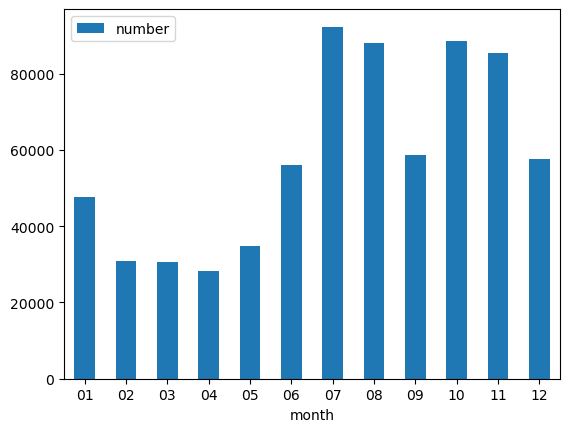

In [632]:
amazon_df_month_number.groupby('month').sum().plot.bar(rot=0)

### b. Mention in your comment what did you observe

Monthly average number of forest fires.

In [633]:
amazon_df_month_number.groupby('month').sum().mean()

number    58231.5
dtype: float64

Months February through May had the lowest number of forest fires, while July, August, October and November had the highest number of forest fires.

June, September and December are months which had an average number of forest fires based on the monthly average.

## 14. In which year was the maximum number of forest fires reported?

In [634]:
amazon_df_year_number = amazon_df_clean.copy()
amazon_df_year_number['year'] = amazon_df_year_number['date-yyyy-mm'].str[:4]
amazon_df_year_number = amazon_df_year_number[['year', 'number']]

### a. Please visualize your output with barplot

The maximum number of forest fires was reported in 2003.

<Axes: xlabel='year'>

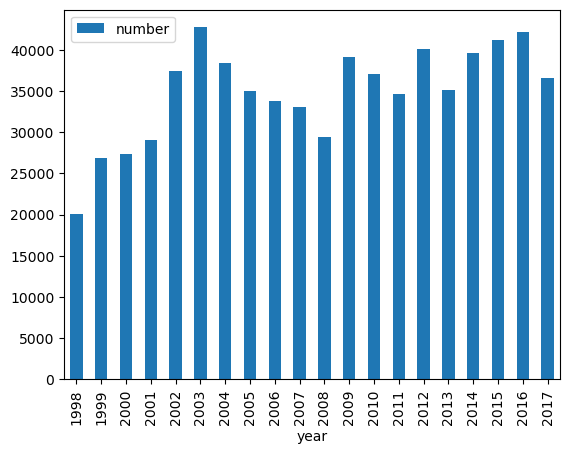

In [635]:
amazon_df_year_number.groupby('year').sum().plot.bar()

## 15. Which state has the maximum number of forest fires reported?

In [636]:
amazon_df_state_number = amazon_df_clean.copy()
amazon_df_state_number = amazon_df_state_number[['state', 'number']]

### a. Visualization should be there

The maximum number of forest fires was reported in the state of Mato Grosso.

In [637]:
total_number_of_fires_reported_by_state = amazon_df_state_number.groupby('state').sum()

<Axes: xlabel='state'>

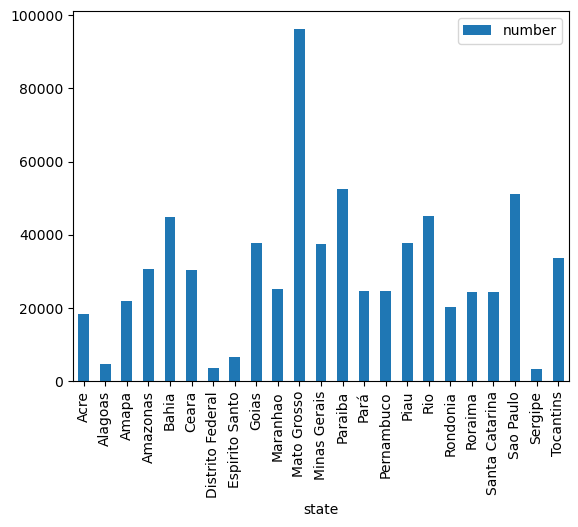

In [638]:
total_number_of_fires_reported_by_state.plot.bar()

### b. If find that barplot is overlapping, then please fix it using rotation

The barplot is not overlapping!

## 16. Find total number of fires were reported in amazonas (state of brazil)

### a. Add in comment the number of reports

In [639]:
print(f"""The total number of fires reported in amazonas (state of brazil) was {
      amazon_df_state_number
      .groupby('state')
      .sum()
      .loc['Amazonas']
      .values[0]
      } fires.""")

The total number of fires reported in amazonas (state of brazil) was 30647 fires.


## 17. Display number of fires were reported in amazon (year-wise)

### a. Kindly visualize it using barplot after having groupby

<Axes: xlabel='year'>

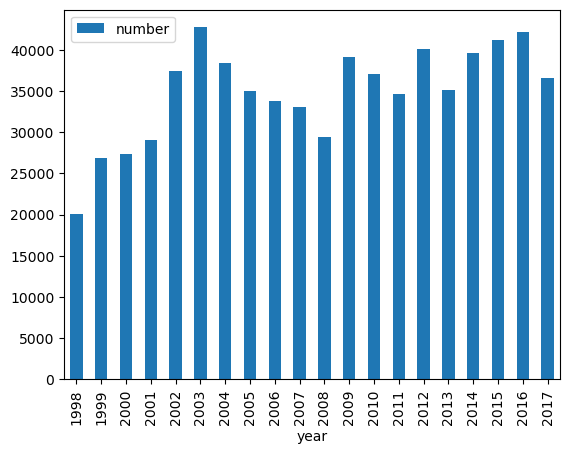

In [640]:
amazon_df_year_number.groupby('year').sum().plot.bar()

### b. Please take care of plot overlapping (it should be neat and clean)

<Axes: xlabel='year'>

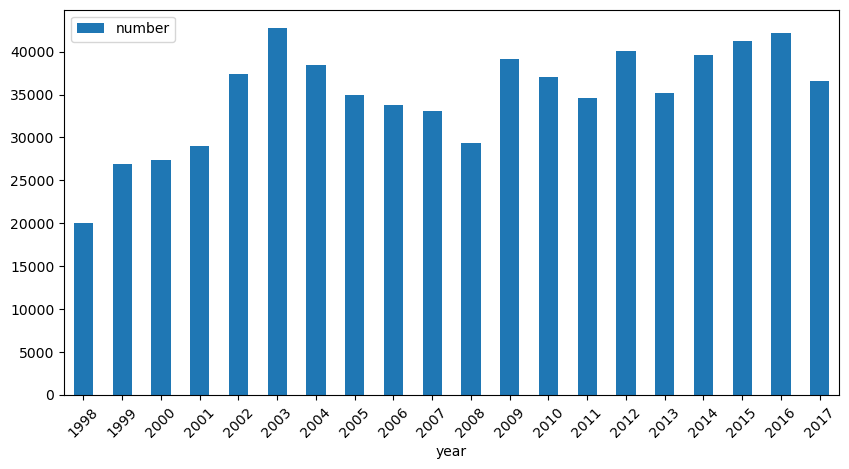

In [641]:
amazon_df_year_number.groupby('year').sum().plot.bar(rot=45, figsize=(10, 5))

## 18. Display number of fires were reported in amazon (day-wise)

### a. You need to visualize the result using weekdays name

In [642]:
day_of_week_name_dict = {0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday",
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"}

In [643]:
amazon_df_weekday_number = amazon_df_clean.copy()
amazon_df_weekday_number['weekday'] = (pd.to_datetime(
                                        amazon_df_weekday_number['date-yyyy-mm'],
                                        format='%Y-%m')
                                       .dt
                                       .dayofweek
                                       )
amazon_df_weekday_number = amazon_df_weekday_number[['weekday', 'number']]

In [644]:
amazon_df_weekday_number

,weekday,number
0,3,0
1,4,0
2,5,0
3,0,0
4,1,0
...,...,...
6449,5,128
6450,6,85
6451,0,223
6452,1,373


In [645]:
amazon_df_weekday_number['weekday'] = amazon_df_weekday_number['weekday'].replace(day_of_week_name_dict)

In [646]:
amazon_df_weekday_number['weekday'] = amazon_df_weekday_number['weekday'].astype("category")

In [647]:
amazon_df_weekday_number['weekday'] = (amazon_df_weekday_number['weekday']
                                       .cat
                                       .reorder_categories(
                                        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)
                                       )

<Axes: xlabel='weekday'>

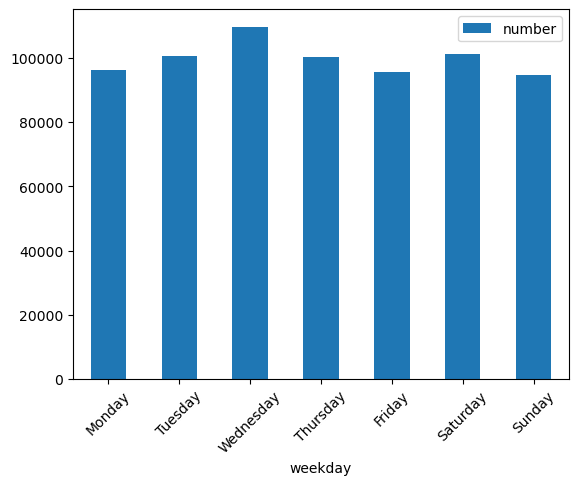

In [648]:
amazon_df_weekday_number.groupby('weekday').sum().plot.bar(rot=45)

In [649]:
amazon_df_weekday_number.groupby('weekday').sum().sort_values('number')

,number
weekday,
Sunday,94824
Friday,95574
Monday,96382
Thursday,100328
Tuesday,100774
Saturday,101203
Wednesday,109693


### b. Don’t forget to mention your observation in comment

The day of the week with the highest number of fires reported was Wednesday.

The day of the week with the lowest number of fires reported was Sunday.

## 19. Find the total number of fires reported in 2015 and visualize data based on each ‘month’.

### a. Showing output with beautiful barplot

In [650]:
amazon_df_year_month_number = amazon_df_clean.copy()
amazon_df_year_month_number['year'] = amazon_df_year_month_number['date-yyyy-mm'].str[:4]
amazon_df_year_month_number['month'] = amazon_df_year_month_number['date-yyyy-mm'].str[-2:]
amazon_df_year_month_number = amazon_df_year_month_number[['month', 'year', 'number']]

In [651]:
print(f"{amazon_df_year_month_number.groupby('year').sum(numeric_only=True).sum().values[0]} fires reported in 2015.")

698778 fires reported in 2015.


In [652]:
amazon_df_year_month_number.groupby('year').sum(numeric_only=True)

,number
year,
1998,20014
1999,26879
2000,27348
2001,29055
2002,37389
2003,42756
2004,38448
2005,35003
2006,33821


<Axes: title={'center': 'Number Of Fires Reported In The Amazon In 2015'}, xlabel='month'>

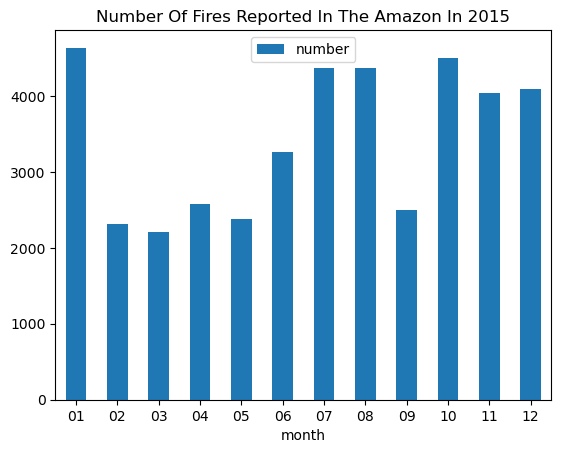

In [653]:
(amazon_df_year_month_number
    .loc[amazon_df_year_month_number['year'] == '2015']
    .groupby('month')
    .sum()
    .plot
    .bar(title='Number of fires reported in the Amazon in 2015'.title(), rot=0)
    )

### b. Mention your observation in comment

Contrary to the overall monthly reporting trends, in 2015 specifically, January was the month with the highest number of fires reported.

## 20. Find the average number of fires reported from highest to lowest (state-wise).

### a. Visualization should be there with proper observation

In [654]:
avg_number_of_fires_reported_by_state = (amazon_df_state_number
 .groupby('state')
 .mean()
 .sort_values('number', ascending=False)
)

Sao Paulo has the highest average number of fires reported, while their total number of fires reported is relatively low.

Rio has a large total number of fires reported, while their average number of fires reported is relatively lower.

This means that Sao Paulo has a more evenly spread number of fires throughout the year, while Rio has a less even distribution of fire reports throughout the year.

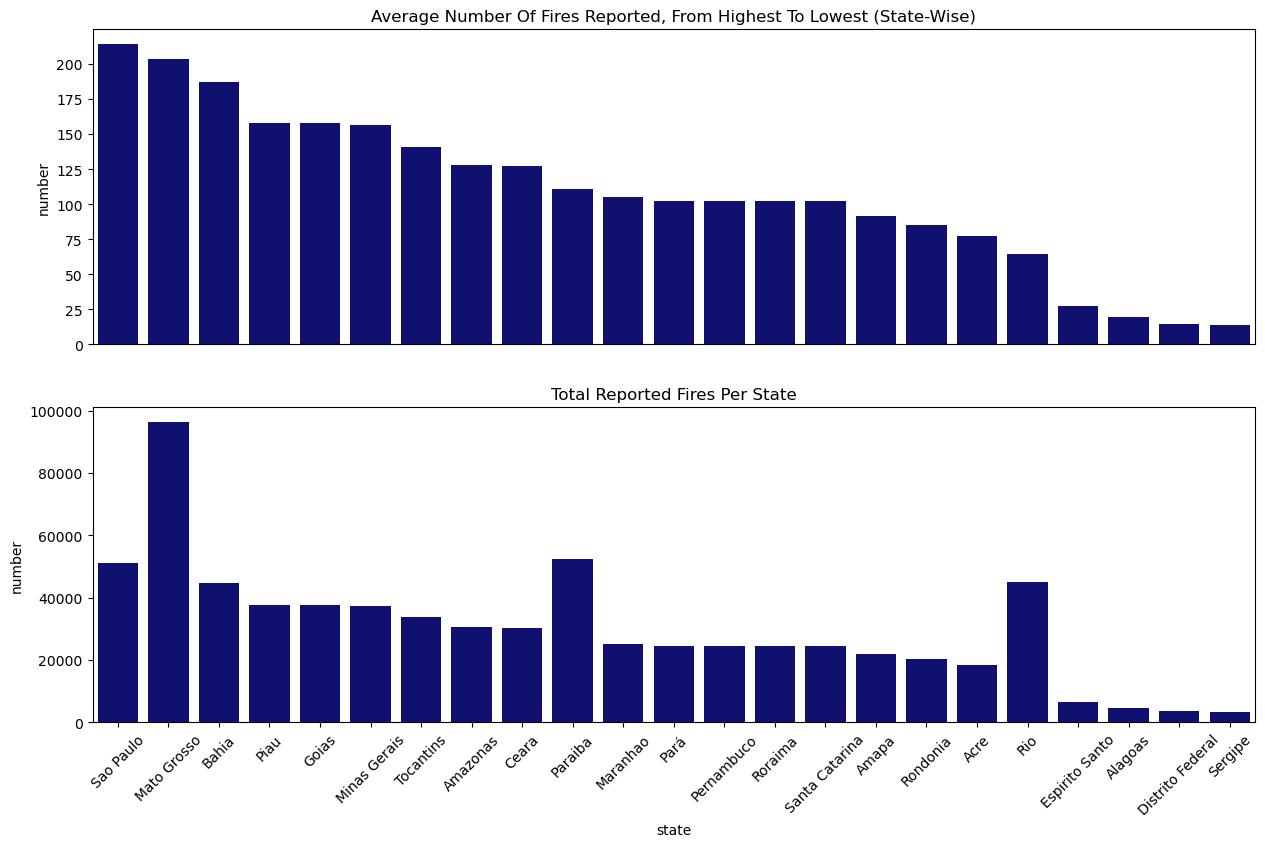

In [655]:
fig, axs = plt.subplots(2, 1, figsize=(15,9))

plt.subplot(211)
sns.barplot(x=avg_number_of_fires_reported_by_state.index,
            y=avg_number_of_fires_reported_by_state['number'], color='navy')
axs[0].get_xaxis().set_visible(False)
plt.title('Average number of fires reported, from highest to lowest (state-wise)'.title())

plt.subplot(212)
sns.barplot(x=total_number_of_fires_reported_by_state.index, y=total_number_of_fires_reported_by_state['number'],
            order=avg_number_of_fires_reported_by_state.index, color='navy')
plt.xticks(rotation=45)
plt.title('Total reported fires per state'.title());

## 21. To find the state names where fires were reported in 'dec' month.

In [656]:
amazon_df_state_month_number = amazon_df_clean.copy()
amazon_df_state_month_number['month'] = amazon_df_state_month_number['date-yyyy-mm'].str[-2:]
amazon_df_state_month_number = amazon_df_state_month_number[['month', 'state', 'number']]

In [657]:
total_number_of_fires_in_dec_by_state = (amazon_df_state_month_number
                                                       .loc[amazon_df_state_month_number['month'] == '12']
                                                       .groupby('state')
                                                       .sum(numeric_only=True)
                                                       .sort_values('number', ascending=False)
)

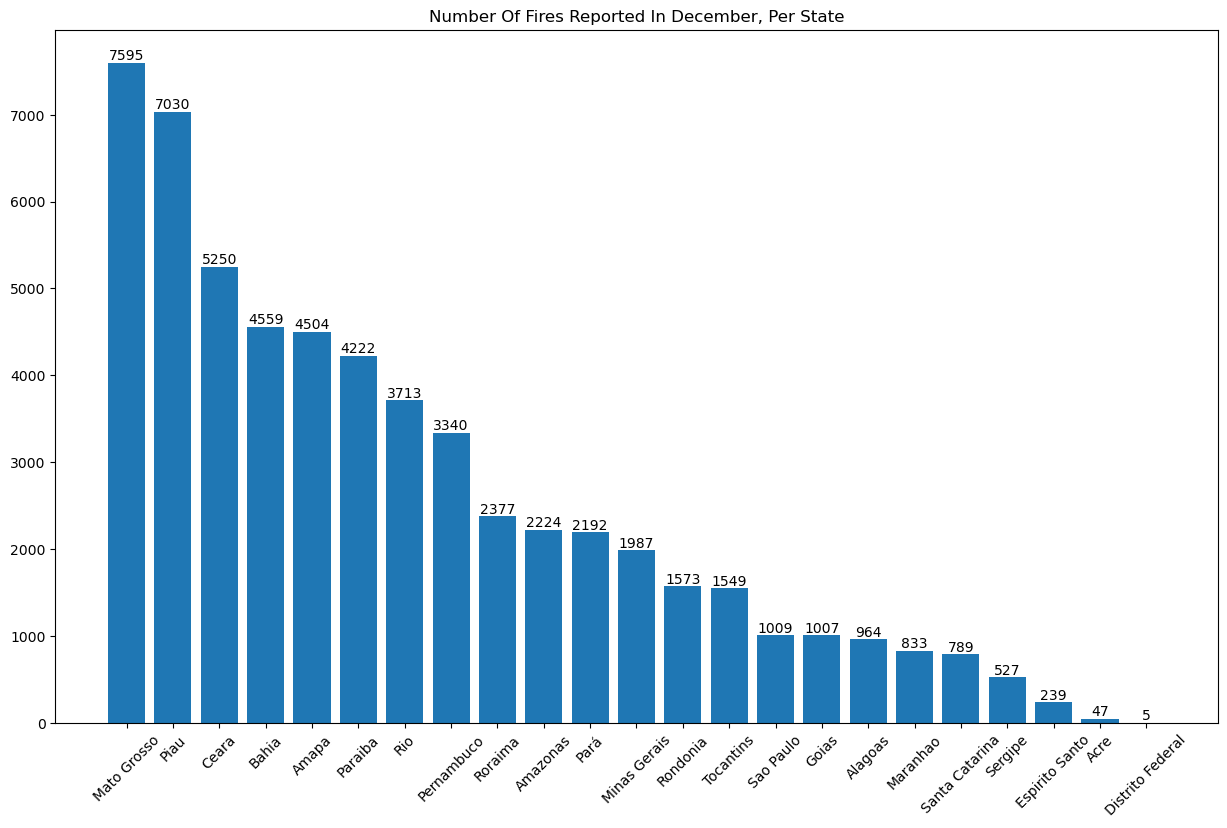

In [658]:
fig, ax = plt.subplots(1, 1, figsize=(15,9))

bars = ax.bar(x=total_number_of_fires_in_dec_by_state.index,
              height=total_number_of_fires_in_dec_by_state['number'])

plt.xticks(rotation=45)
ax.bar_label(bars)
plt.title('Number of Fires reported in December, per state'.title());

## Bonus: Export dataframe to desired location with no index column

### Data Visualization/Analysis Additions Before Exporting

In [87]:
amazon_df_clean.columns = amazon_df_clean.columns.str.replace('_', ' ').str.title()

### Export Cleaned Dataframe to File

In [88]:
amazon_df_clean.to_csv('amazon_clean.csv', index=False)